<a href="https://colab.research.google.com/github/Yuito-K/risawa/blob/main/pandas_data_processing_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas を用いたデータ処理
架空の小売業の1年間のデータセットを生成するコードを以下に示す。  
コード中で乱数を用いているため，実行するたびに「生成されるデータ」は異なる。

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# データセットの作成
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
n_samples = len(dates)

data = {
    'Date': dates,
    'Sales': np.random.normal(1000, 200, n_samples),
    'Customer_Visits': np.random.poisson(50, n_samples),
    'Marketing_Spend': np.random.normal(500, 100, n_samples),
    'Product_Category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books'], n_samples),
    'Customer_Satisfaction': np.random.normal(4, 0.5, n_samples)
}

# 欠損値と異常値の挿入
data['Sales'][np.random.choice(n_samples, 20, replace=False)] = np.nan
data['Marketing_Spend'][np.random.choice(n_samples, 10, replace=False)] = np.nan
data['Customer_Satisfaction'][np.random.choice(n_samples, 15, replace=False)] = np.random.uniform(1, 2, 15)

df = pd.DataFrame(data)

In [16]:
# データフレームの先頭を眺めてみる
df.head()

,Date,Sales,Customer_Visits,Marketing_Spend,Product_Category,Customer_Satisfaction
0,2023-01-01,956.797596,48,424.839662,Food,4.432610
1,2023-01-02,1115.507948,57,463.735061,Electronics,3.644759
2,2023-01-03,985.401680,50,535.629872,Clothing,4.625475
3,2023-01-04,1603.595640,49,418.122016,Clothing,3.807692
4,2023-01-05,919.865087,56,443.660987,Books,4.746807


In [17]:
df.describe()

,Date,Sales,Customer_Visits,Marketing_Spend,Customer_Satisfaction
count,365,345.000000,365.000000,355.000000,365.000000
mean,2023-07-02 00:00:00,1004.248430,49.778082,495.191500,3.892614
min,2023-01-01 00:00:00,528.559400,30.000000,250.734446,1.005156
25%,2023-04-02 00:00:00,859.617099,45.000000,426.413611,3.601913
50%,2023-07-02 00:00:00,990.238486,49.000000,493.719239,3.961938
75%,2023-10-01 00:00:00,1137.278094,55.000000,561.545751,4.332570
max,2023-12-31 00:00:00,1603.595640,73.000000,754.812725,5.250588
std,NaN,199.140318,6.934352,97.232997,0.705922


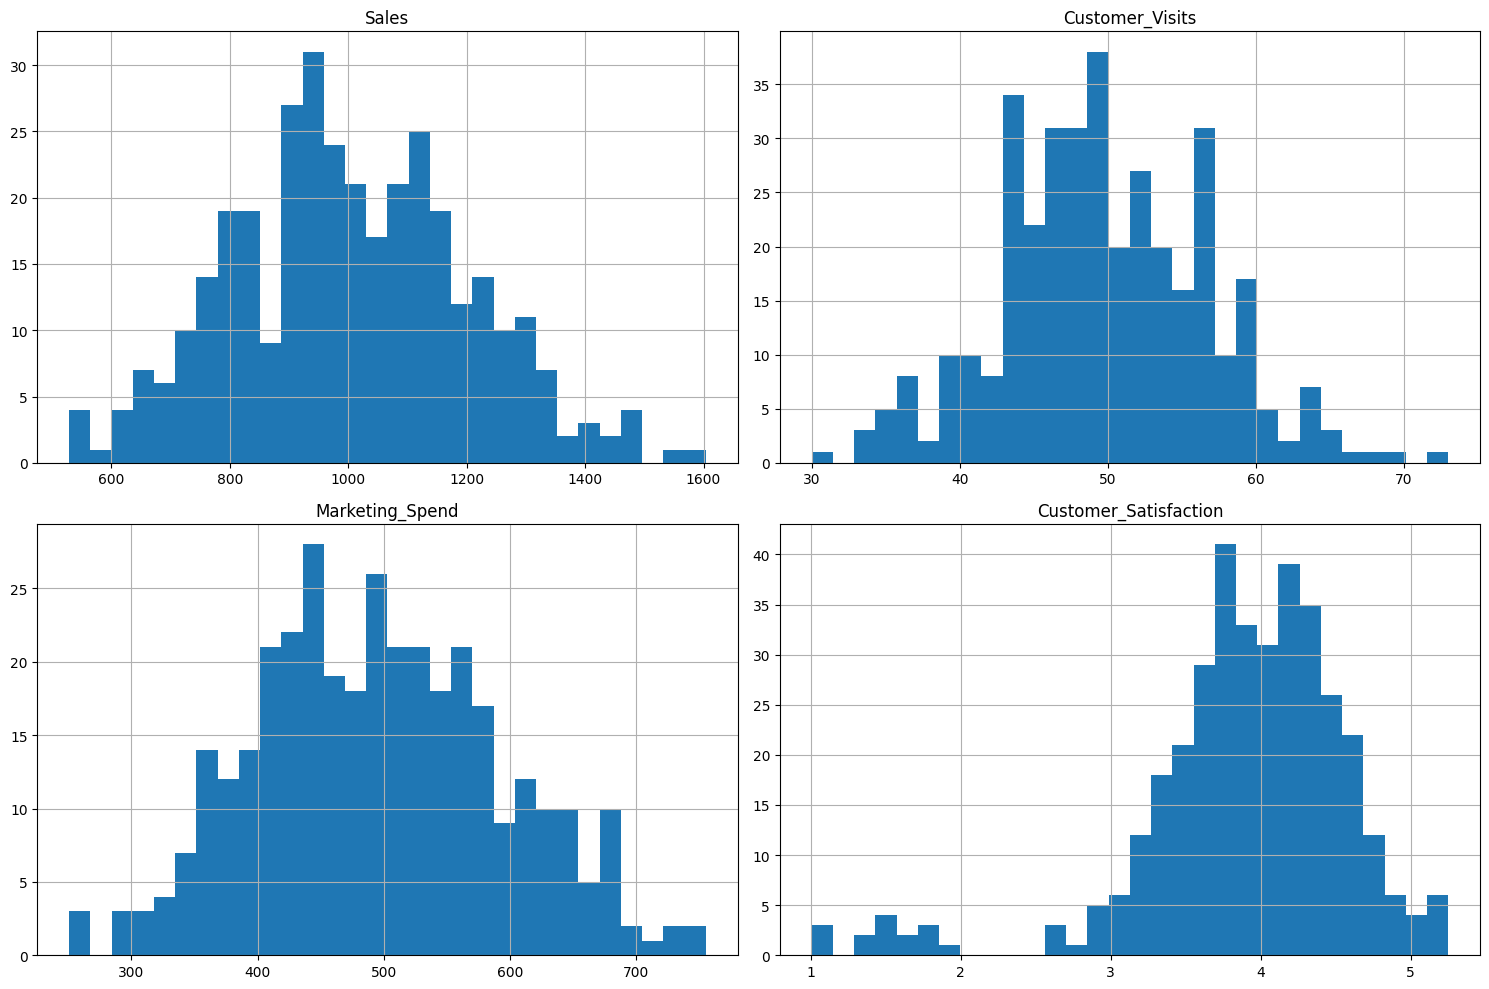

In [18]:
# prompt: 数値データのヒストグラム

import matplotlib.pyplot as plt
# 各数値データのヒストグラム
numerical_cols = ['Sales', 'Customer_Visits', 'Marketing_Spend', 'Customer_Satisfaction']
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

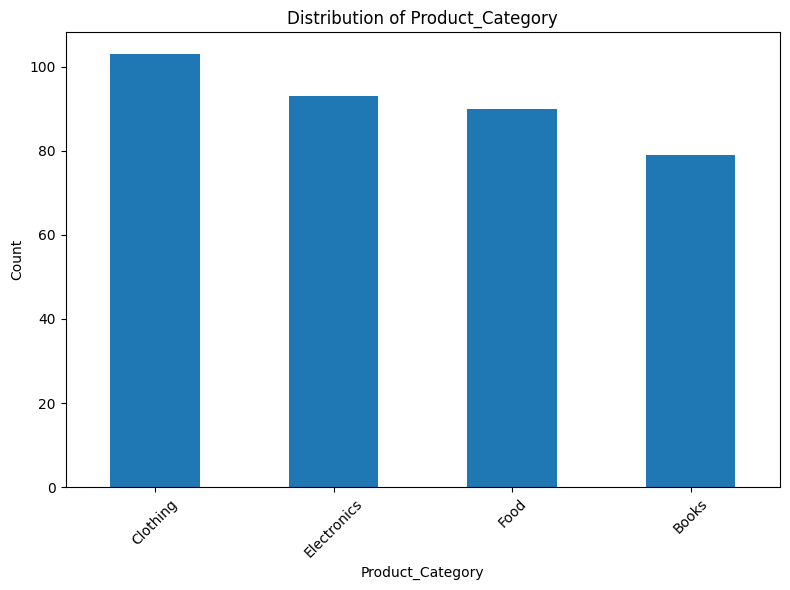

In [19]:
# prompt: カテゴリカルデータの棒グラフ

import matplotlib.pyplot as plt
# カテゴリカルデータの棒グラフ
categorical_cols = ['Product_Category']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Customer_Visits', ylabel='Marketing_Spend'>

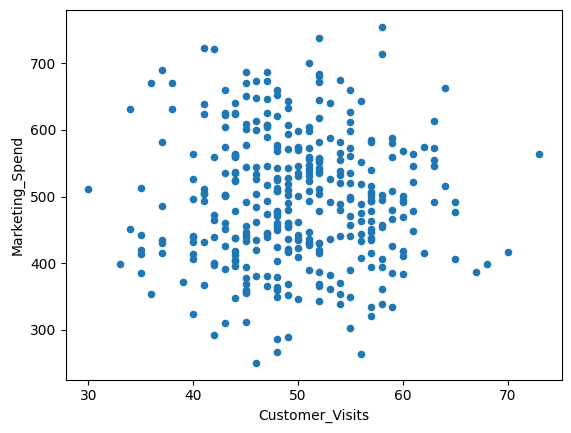

In [20]:
df.plot.scatter(x='Customer_Visits',y='Marketing_Spend')

In [21]:
# prompt: 欠損値を「列の平均値」で補完

# 各列の平均値で欠損値を補完
for col in numerical_cols:
  if df[col].isnull().any():
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# 欠損値が補完されたか確認
print(df.isnull().sum())

Date                     0
Sales                    0
Customer_Visits          0
Marketing_Spend          0
Product_Category         0
Customer_Satisfaction    0
dtype: int64


<ipython-input-21-4099571866>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [22]:
# prompt:  ”Product_Category” をダミー変数に変換

import pandas as pd
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Product_Category'], prefix='Category')
df.head()

,Date,Sales,Customer_Visits,Marketing_Spend,Customer_Satisfaction,Category_Books,Category_Clothing,Category_Electronics,Category_Food
0,2023-01-01,956.797596,48,424.839662,4.432610,False,False,False,True
1,2023-01-02,1115.507948,57,463.735061,3.644759,False,False,True,False
2,2023-01-03,985.401680,50,535.629872,4.625475,False,True,False,False
3,2023-01-04,1603.595640,49,418.122016,3.807692,False,True,False,False
4,2023-01-05,919.865087,56,443.660987,4.746807,True,False,False,False


In [23]:
# prompt:  “Marketing_Spend”, “Customer_Satisfaction” を標準化および正規化

# "Marketing_Spend", "Customer_Satisfaction" の標準化と正規化

# 標準化
scaler_standard = StandardScaler()
df[['Marketing_Spend_standardized', 'Customer_Satisfaction_standardized']] = scaler_standard.fit_transform(df[['Marketing_Spend', 'Customer_Satisfaction']])

# 正規化
scaler_minmax = MinMaxScaler()
df[['Marketing_Spend_normalized', 'Customer_Satisfaction_normalized']] = scaler_minmax.fit_transform(df[['Marketing_Spend', 'Customer_Satisfaction']])

# 結果の確認
print(df[['Marketing_Spend', 'Customer_Satisfaction', 'Marketing_Spend_standardized', 'Customer_Satisfaction_standardized', 'Marketing_Spend_normalized', 'Customer_Satisfaction_normalized']].head())

   Marketing_Spend  Customer_Satisfaction  Marketing_Spend_standardized  \
0       424.839662               4.432610                     -0.734694   
1       463.735061               3.644759                     -0.328504   
2       535.629872               4.625475                      0.422304   
3       418.122016               3.807692                     -0.804847   
4       443.660987               4.746807                     -0.538140   

   Customer_Satisfaction_standardized  Marketing_Spend_normalized  \
0                            0.766001                    0.345393   
1                           -0.351591                    0.422555   
2                            1.039587                    0.565181   
3                           -0.120465                    0.332067   
4                            1.211699                    0.382731   

   Customer_Satisfaction_normalized  
0                          0.807327  
1                          0.621751  
2                   